# Assignment 8 - Perceptron & MLP

### This week only has one assignment for all tracks of the course.

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Jane and John Doe]

In [1]:
# Daniel Thompson, Paola Gega

## Task 8.1: Perceptron

* Implement the single `Perceptron` Model class. **(RESULTS)**
* Train your Perceptron model to solve on the `AND gate` using `gradient descent`. Report in the results, can it predict the correct outputs for each of the 4 input combinations? **(RESULTS)**
* Now train your Perceptron model to solve on the `XOR gate` using `gradient descent`. Report in the results. **(RESULTS)**
* Finally, plot the decision boundary for both trained Perceptron models. **(RESULTS)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        # Heaviside step function
        return np.where(x >= 0, 1, 0)
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

In [3]:
# Dataset for AND and XOR gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_AND = np.array([0, 0, 0, 1])  # AND gate
y_XOR = np.array([0, 1, 1, 0])  # XOR gate

In [4]:
AND_model = Perceptron(learning_rate=0.1, n_iter=10)
# Training on AND gate
AND_model.fit(X, y_AND)
predictions_AND = AND_model.predict(X)
print("AND Gate Predictions:", predictions_AND)
# Training on XOR gate
XOR_model = Perceptron(learning_rate=0.1, n_iter=10)
XOR_model.fit(X, y_XOR)
predictions_XOR = XOR_model.predict(X)
print("XOR Gate Predictions:", predictions_XOR)

AND Gate Predictions: [0 0 0 1]
XOR Gate Predictions: [1 1 0 0]


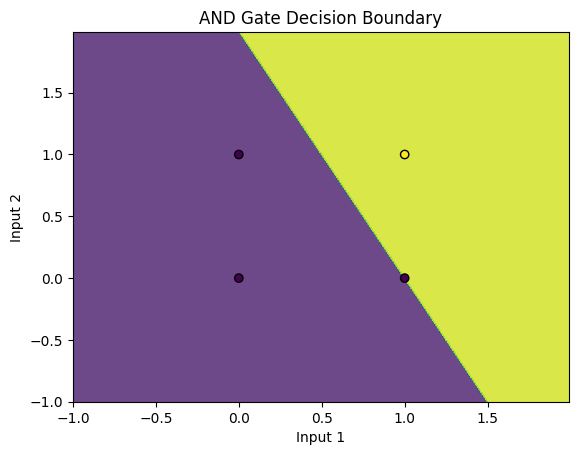

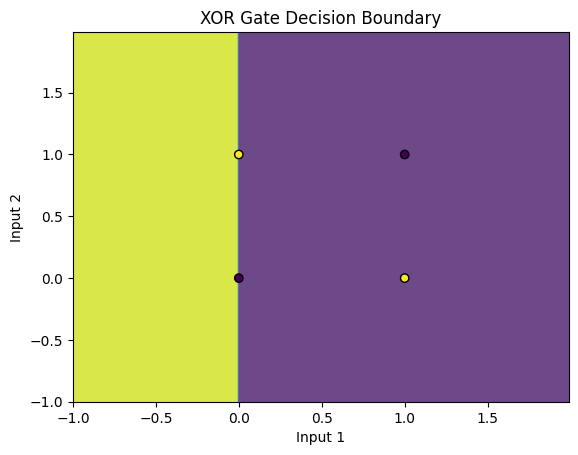

In [5]:
# Plot the decision boundary for both trained perceptron models
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

plot_decision_boundary(AND_model, X, y_AND, "AND Gate Decision Boundary")
plot_decision_boundary(XOR_model, X, y_XOR, "XOR Gate Decision Boundary")

**Report:** We correctly solve the `AND gate` within 10 iterations, but as shown in lecture we cannot solve the `XOR gate` with a single layer because it is not linearly separable.

## Task 8.2: Multi-Layer Perceptron (MLP)

* Use the `PyTorch` framework to build a small MLP. **(RESULTS)**
* Train your MLP on the `XOR gate` using `PyTorch`'s `autograd` functionality. Report on the result. Can your model solve the XOR problem? Test it for all 4 input combinations. **(RESULTS)**
* Plot the decision boundary of your trained MLP. **(RESULTS)**

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.act = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.act(out)
        out = self.fc2(out)
        return out

In [7]:
def train(model, X, y):
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(5000):
        optimizer.zero_grad()
        pred = model(X)
        loss = torch.sum((y-pred)**2)/y.shape[0]
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss = {loss.item():.4f}")

def test(model, X, y):
    with torch.no_grad():
        X_tensor = torch.FloatTensor(X)
        pred = model(X_tensor)
        predicted_classes = (pred >= 0.5).float()
        return predicted_classes.numpy()


Epoch 0, Loss = 0.4923
Epoch 500, Loss = 0.0000
Epoch 1000, Loss = 0.0000
Epoch 1500, Loss = 0.0000
Epoch 2000, Loss = 0.0000
Epoch 2500, Loss = 0.0000
Epoch 3000, Loss = 0.0000
Epoch 3500, Loss = 0.0000
Epoch 4000, Loss = 0.0000
Epoch 4500, Loss = 0.0000
MLP XOR Gate Predictions: [0. 1. 1. 0.]


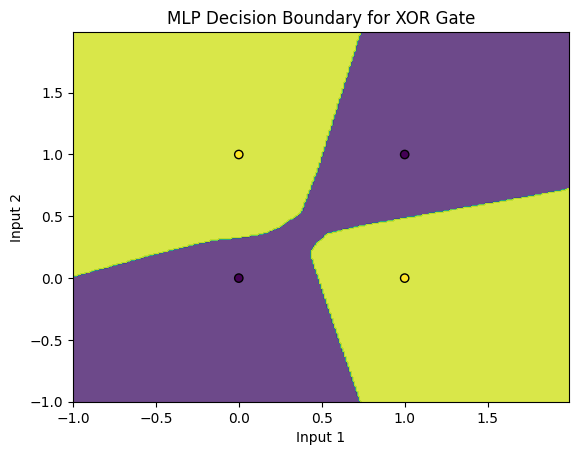

In [8]:
# Train an MLP model on the XOR gate
mlp_model = MLP(input_size=2, hidden_size=16, output_size=1)
X_tensor = torch.FloatTensor(X)
y_XOR_tensor = torch.FloatTensor(y_XOR).view(-1, 1)
train(mlp_model, X_tensor, y_XOR_tensor)
predictions_MLP_XOR = test(mlp_model, X, y_XOR)
print("MLP XOR Gate Predictions:", predictions_MLP_XOR.flatten())

# Plotting decision boundary for MLP on XOR
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = test(model, grid, None)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()
plot_decision_boundary(mlp_model, X, y_XOR, "MLP Decision Boundary for XOR Gate")

**Report:** Using the architecture suggested in the lecture notes, we are able to solve the XOR problem.

## Congratz, you made it! :)